[View in Colaboratory](https://colab.research.google.com/github/Dalbongjooin/tutorial/blob/master/20180726_library.ipynb)

공공데이터포털의 [전국도서관표준데이터](https://www.data.go.kr/dataset/15013109/standard.do) 일부를 실습용으로 가공하였습니다.

# 사전 준비

In [52]:
# 나눔글꼴 설치
!apt install fonts-nanum

# Plotnine 패키지 설치
!pip install plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20161025-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


데이터 읽어오기.

In [0]:
import pandas as pd
import numpy as np
from plotnine import *

src = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/messy/library.csv')

데이터 복사본 만들기. 중간에 데이터가 망가지면 이 셀부터 다시 실행하면 됩니다 :)

In [54]:
df = src.copy()
df.head(3)

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일


# 데이터 살펴보기

시도별 도서관 수는?

In [55]:
result = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand = False).value_counts()
# \(([^)]+)\)$
# [^abc : Not a or b or c
# expand = True : DataFrame형식을 return 합니다.
# expand = False: 객체나 정규표현식 패턴에 따라 \
# Series, Index,  또는 DataFrame형식을 return합니다. 
# pandas version 0.23.0부터는 expand=True가 기본값입니다.

# 정규표현식에서 extract는 먹는다는 방식으로 이해하면 될 듯 ! 
result


서울특별시      222
경상남도       198
경기도        165
부산광역시      104
전라북도       101
울산광역시       69
강원도         53
충청북도        52
대전광역시       50
전라남도        44
경상북도        41
대구광역시       40
충청남도        16
인천광역시       11
광주광역시        3
제주특별자치도      2
Name: 도서관명, dtype: int64

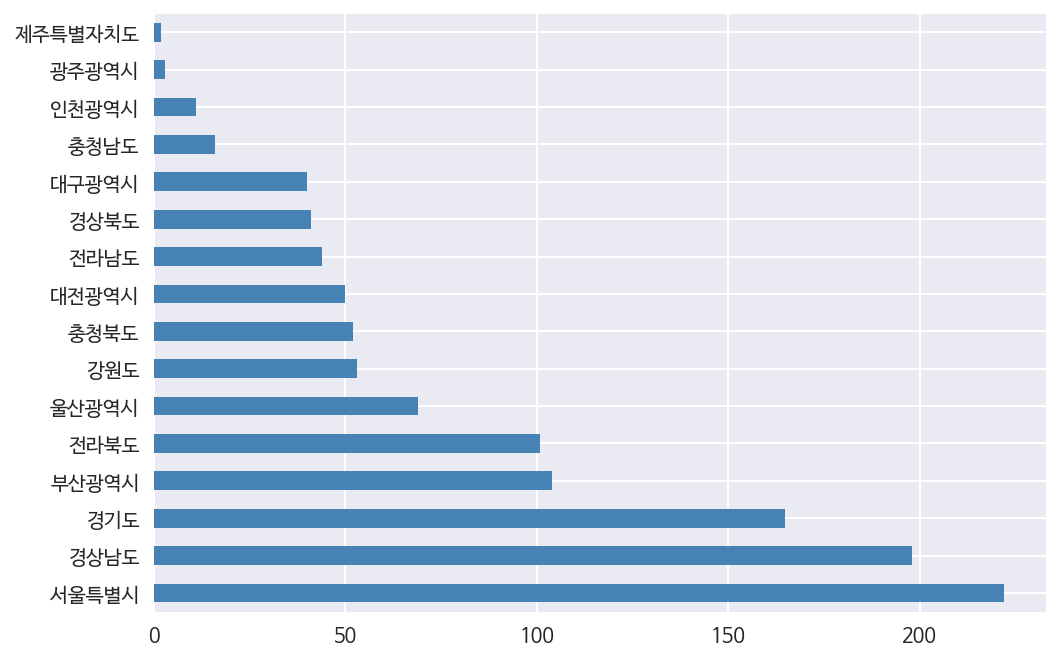

In [56]:
# 그래프로 확인해봅니다. 
result.plot.barh(color='steelblue')

소장자료수(도서, 연속간행물, 비도서를 모두 합한 값)가 가장 많은 도서관은?

In [57]:
#[]은 가장 기본적인 인덱싱방법입니다.
# DataFrame에서 frame[column_name]을 하면 칼럼 전체의 데이터가 선택되며,
# 이는 series type으로 변환되어 return됩니다. 

# 이 시리즈 타입의 데이터를 더하면 int64 type를 return합니다. 


df['자료수'] = df['도서'] + df['연속간행물'] + df['비도서']

df['자료수']



0       926978
1       389078
2       339815
3       322564
4       346874
5       354004
6       339290
7       328293
8       318041
9       390532
10      310185
11      302134
12      290251
13      313830
14      288229
15      282504
16      278159
17      266618
18      289578
19      252241
20      320324
21      241019
22      221138
23      228969
24      229465
25      223078
26      220175
27      254336
28      199664
29      203454
         ...  
1141      1353
1142      1301
1143      1300
1144      1303
1145      1300
1146      1255
1147      1238
1148      1209
1149      1200
1150      1200
1151      1200
1152      1200
1153      1203
1154      1206
1155      1150
1156      1142
1157      1130
1158      1120
1159      1103
1160      1100
1161      1100
1162      1100
1163      1100
1164      1060
1165      1000
1166      1000
1167      1153
1168      1000
1169       744
1170       427
Name: 자료수, Length: 1171, dtype: int64

In [58]:
#df를 찍어보면 칼럼이 하나 추가되었습니다. 
df.head()




,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874


In [59]:
#자료수가 가장 많은 순서대로 정렬해봅니다. 
# 함수는 sort_values()를 사용합니다. 
#sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df.sort_values(by='자료수', ascending = False)

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978
9,9,석수도서관(경기도),031-8045-6106,"37.411601,126.902654",2000,302086,277,88169,"매주 월요일, 국가지정공휴일",390532
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078
5,5,경기도립성남도서관(경기도),031-730-3500,"37.446635,127.150098",799,311395,142,42467,"매주월요일, 국가지정공휴일",354004
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815
6,6,창원도서관(경상남도),055-278-2801,"35.224309,128.663941",1222,311332,487,27471,매주 월요일 및 국가지정공휴일,339290
7,7,남부도서관(울산광역시),052-259-7580,"35.535878,129.294949",1405,304433,476,23384,"매주 월요일, 법정공휴일",328293
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564
20,20,시립도서관(충청북도),043-201-4062,"36.612477,127.505766",662,241064,200,79060,매주 월요일 국가지정 공휴일,320324


일요일에 쉬는 도서관은?

In [60]:
# "삽질할 수 있는 환경 만들기.""
# 휴관일의 unique값을 뽑아내서 
# 어떤 것을 정규표현식을 이용해 extract하면 좋을지본다.
# 이를 regex101.com으로 옮겨서 연습을 해보면 좋다! 
df['휴관일'].unique()

array(['매주 월요일', '매주 월요일 및 국가지정공휴일', '월요일 및 국가지정 공휴일', '매주 금요일, 국가지정공휴일',
       '매주월요일, 국가지정공휴일', '매주 월요일, 법정공휴일', '매주월요일+국가지정공휴일',
       '매주 월요일, 국가지정공휴일', '공휴일', '법정공휴일', '매주월요일, 법정공휴일', '매주월요일,국가지정공휴일',
       '월요일', '매주 월요일 국가지정 공휴일', '매주월요일 국가지정공휴일', '매주 월요일 및 국가지정 공휴일',
       '월요일, 법정공휴일', '월요일, 공휴일', '토요일+일요일+공휴일', '매주 월요일 및 법정공휴일', '매주월요일',
       '일요일, 법정공휴일', '매주 일요일', '토,일,공휴일', '매주토, 일요일', '매주토,일요일', '없음',
       '법정공휴일, 주말', '국가지정공휴일', '매주일요일+국가지정공휴일', '법정공휴일, 일요일', '일요일',
       '매주 토/일요일/국가지정공휴일', '매주 토요일, 일요일, 법정공휴일', '매주월,일요일,국가지정공휴일',
       '매주 토,일요일,국가지정공휴일', '토요일, 법정공휴일', '일요일, 공휴일', '매주 주말, 국가지정공휴일',
       '매주 일요일, 국가지정공휴일', '매주토요일, 매주일요일, 법정공휴일', '매주 토, 일요일 및 국가지정 공휴일',
       '주말, 법정공휴일', '매주 일, 월요일/ 법정 공휴일', '토, 일, 공휴일', '토 일 공휴일',
       '매주 토요일·일요일, 국가지정공휴일', '매주 토요일, 일요일, 공휴일', '토, 일, 법정공휴일'],
      dtype=object)

In [61]:
df['휴관일'].str.extractall(r'(일요일|[\b\s,]일[\b\s,]|주말)')

,,0
,match,
30,0,일요일
82,0,일요일
187,0,일요일
189,0,일요일
193,0,일요일
201,0,",일,"
247,0,일요일
248,0,일요일
250,0,",일,"


In [62]:


#차집합으로 확인하기.

pattern = r'일요일|[\b\s,]일[,\s\b]|주말'


a = set(df['휴관일'])

# datatype set ex)  a = set('abracadabra')
#                   a
#                   {'a', 'r','b', 'd 'c'}
#순서가 없음, unique한 letter를 뽑아줌. 

b = set(df['휴관일'][df['휴관일'].str.contains(pattern)])

# df['휴관일']중에서 pattern 과 일치하는 것을 indexing한다. 
# 이 series들을 set type으로 만듦. 


print(a - b) 

# 여기서 일요일이 안찍히면 성공! 



{'법정공휴일', '국가지정공휴일', '매주 월요일 및 국가지정공휴일', '매주월요일', '매주 월요일', '매주월요일+국가지정공휴일', '매주 월요일 국가지정 공휴일', '매주 월요일, 법정공휴일', '월요일', '월요일, 공휴일', '없음', '매주월요일, 법정공휴일', '월요일, 법정공휴일', '매주월요일,국가지정공휴일', '매주 월요일, 국가지정공휴일', '매주월요일, 국가지정공휴일', '매주 월요일 및 법정공휴일', '월요일 및 국가지정 공휴일', '토요일, 법정공휴일', '매주 금요일, 국가지정공휴일', '매주 월요일 및 국가지정 공휴일', '공휴일', '매주월요일 국가지정공휴일'}


In [63]:
# 마지막으로 일요일에 쉬는 도서관 loc()함수로 확인! 

df.loc[df['휴관일'].str.contains(pattern)][['도서관명', '휴관일']]

,도서관명,휴관일
30,유원대학교 도서관(충청북도),토요일+일요일+공휴일
82,삼례분관(전라북도),"일요일, 법정공휴일"
187,중리초등복합시설도서관(경상남도),매주 일요일
189,고산분관(전라북도),"일요일, 법정공휴일"
193,완주군립중앙(전라북도),"일요일, 법정공휴일"
201,전북도청도서관(전라북도),"토,일,공휴일"
247,구갈희망누리도서관(경기도),매주 일요일
248,둔산영어도서관(전라북도),"일요일, 법정공휴일"
250,대구시청작은도서관(대구광역시),"토,일,공휴일"
254,당정문화도서관(경기도),"토,일,공휴일"


# 데이터 다듬기

"위도"와 "경도" 분리하기.

In [64]:
df.head()

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874


In [65]:
# 글자수가 같다는 점에서 착안해 slice()함수 이용하기.

temp = df.loc[df['위경도'].str.len() == 20]['위경도']


temp.str.slice(0, 9)

0       36.309678
1       37.160015
2       35.233151
3       37.773104
4       37.467855
5       37.446635
6       35.224309
7       35.535878
8       37.410561
9       37.411601
10      36.053655
11      37.386195
13      35.808704
14      37.304552
15      35.213033
16      37.155111
17      36.788259
18      35.528204
19      37.559096
20      36.612477
21      37.361476
22      37.351545
23      35.272726
24      35.558441
25      37.396057
26      35.829133
27      37.465299
28      35.940409
29      37.286745
30      36.193769
          ...    
1141    35.153249
1142    35.558417
1143    35.568791
1144    35.146423
1145    37.438562
1146    35.089001
1147    35.568791
1148    34.989068
1149    37.413598
1150    34.964382
1151    35.931228
1152    37.467327
1153    36.316094
1154    35.251971
1155    34.982819
1156    35.308119
1157    35.079095
1158    35.891384
1159    35.612367
1160    36.339576
1161    37.443682
1162    37.351275
1163    37.457581
1164    35.123566
1165    35

In [0]:
#1.본 데이터의 '위경도' col 에서 ','을 기준으로 좌는 위도, 우는 경도 입니다
#2.좌 , 우 를 나눠서 '위도','경도' 라는 col 을 새로 생성해서 넣어주는 과정입니다.

df['위도'] = df['위경도'].str.extract(r'(\w+),\w+', expand=False).astype(np.float32)
df['위도']

df['경도'] = df['위경도'].str.extract(r'.+,(.+)', expand=False).astype(np.float32)
# 1.expand = False 라면 'series' 타입으로 평가합니다. 
#2.astype 은 데이터 타입을 바꿔주는 함수 입니다 .

In [67]:
result = pd.DataFrame(df['위경도'].str.split(',',1).tolist(),columns = ['위도','경도'])
result

,위도,경도
0,36.309678,127.409648
1,37.160015,127.450014
2,35.233151,128.874325
3,37.773104,128.912992
4,37.467855,126.873710
5,37.446635,127.150098
6,35.224309,128.663941
7,35.535878,129.294949
8,37.410561,127.252878
9,37.411601,126.902654


(잠깐 재미로) 지도 그려보기.

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 1171 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


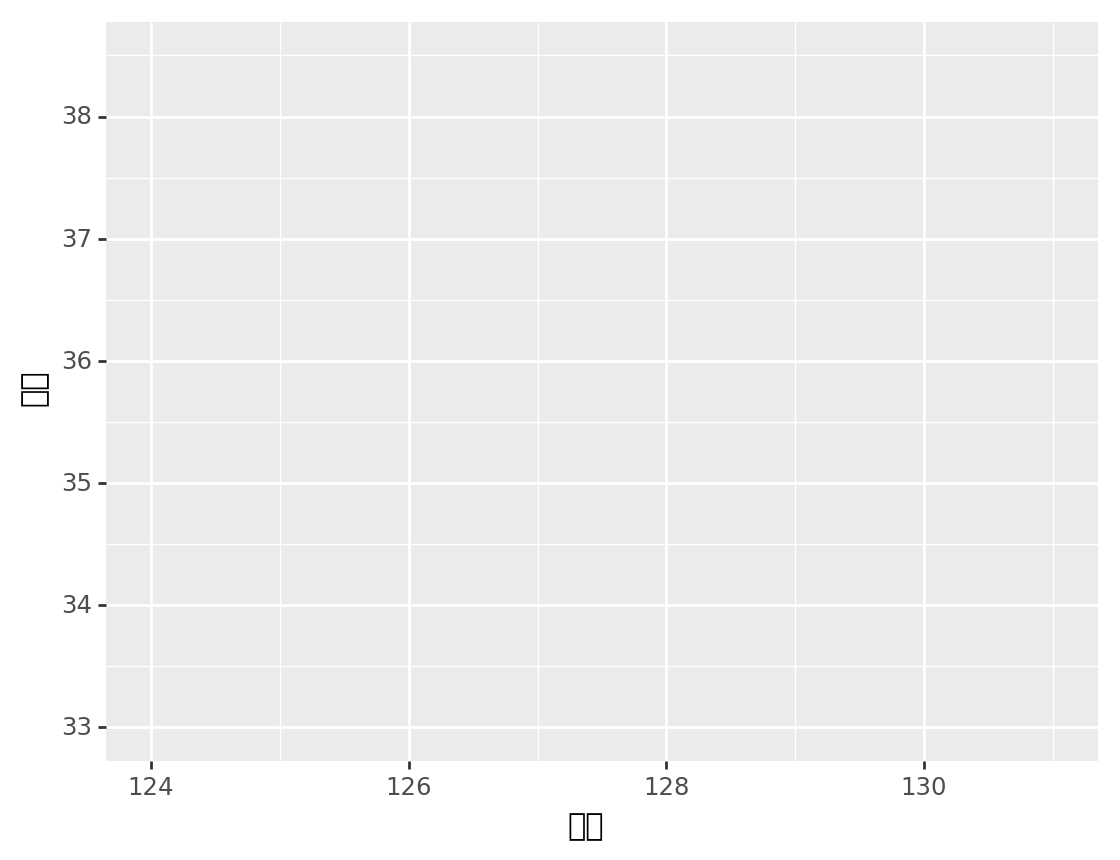

<ggplot: (-9223363273686593883)>

In [68]:
(
    ggplot(aes(x='경도', y='위도'), df) +
    geom_point() +
    xlim([124, 131]) +
    ylim([33, 38.5])
)

"도서관명"과 "지역" 분리하기.

In [69]:
df['시도'] = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False)
df.head()

# df['도서관명'] = df['도서관명'].str.split('(', expand = True)[0]
# df['도서관명']

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수,위도,경도,시도
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978,309678.0,127.409645,대전광역시
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078,160015.0,127.450012,충청북도
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815,233151.0,128.874329,경상남도
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564,773104.0,128.912994,강원도
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874,467855.0,126.873711,경기도


In [70]:
df.head()

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수,위도,경도,시도
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,매주 월요일,926978,309678.0,127.409645,대전광역시
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,매주 월요일,389078,160015.0,127.450012,충청북도
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,매주 월요일 및 국가지정공휴일,339815,233151.0,128.874329,경상남도
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월요일 및 국가지정 공휴일,322564,773104.0,128.912994,강원도
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,"매주 금요일, 국가지정공휴일",346874,467855.0,126.873711,경기도


관찰 단위(observational units)에 따라 표 두 개(도서관, 소장자료)로 분리하기.

In [0]:
libraries = df[['key', '도서관명', '시도', '위도', '경도' , '좌석수', '전화번호', '휴관일']]
collections = df[['key', '도서', '연속간행물','비도서']]


칼럼 제목에 담긴 데이터(범주형 데이터)를 변수로 만들기.

In [72]:
libraries.head()
collections.head()

,key,도서,연속간행물,비도서
0,0,802933,530,123515
1,1,378786,117,10175
2,2,322150,195,17470
3,3,316468,24,6072
4,4,315548,916,30410


In [73]:
collections = collections.melt(id_vars='key', value_vars=['도서','연속간행물','비도서'],
                 var_name='종류',
                 value_name = '수량')

collections.head()


,key,종류,수량
0,0,도서,802933
1,1,도서,378786
2,2,도서,322150
3,3,도서,316468
4,4,도서,315548


휴관일은 어떻게 하면 좋을까?

In [74]:
import re
#1
def cleanse_closing(raw):
  rules = {
      r'매주': '',
      r'요일': '',
      r'주말': '토일',
      r'(법정|국가지정)?\s*공휴일': '공',    
      r'[^월금토일공]': '',
  }
#2
  for pattern, replacer in rules.items():
    raw = re.sub(pattern, replacer, raw)
  return raw

#3
pairs = [(raw, cleanse_closing(raw)) for raw in set(df['휴관일'])]
for raw, clean in pairs:
  print(raw, '=>', clean)

일요일, 공휴일 => 일공
법정공휴일 => 공
국가지정공휴일 => 공
매주 일, 월요일/ 법정 공휴일 => 일월공
토, 일, 공휴일 => 토일공
매주 월요일 및 국가지정공휴일 => 월공
매주 토요일, 일요일, 법정공휴일 => 토일공
매주월요일 => 월
매주 월요일 => 월
매주 토요일·일요일, 국가지정공휴일 => 토일공
일요일 => 일
매주 토/일요일/국가지정공휴일 => 토일공
매주월요일+국가지정공휴일 => 월공
매주 월요일 국가지정 공휴일 => 월공
매주 월요일, 법정공휴일 => 월공
월요일 => 월
월요일, 공휴일 => 월공
매주 일요일 => 일
매주월요일, 법정공휴일 => 월공
없음 => 
매주 토,일요일,국가지정공휴일 => 토일공
매주 일요일, 국가지정공휴일 => 일공
매주 토요일, 일요일, 공휴일 => 토일공
월요일, 법정공휴일 => 월공
매주 주말, 국가지정공휴일 => 토일공
토 일 공휴일 => 토일공
매주월요일,국가지정공휴일 => 월공
매주 월요일, 국가지정공휴일 => 월공
매주토요일, 매주일요일, 법정공휴일 => 토일공
매주월요일, 국가지정공휴일 => 월공
매주월,일요일,국가지정공휴일 => 월일공
매주 월요일 및 법정공휴일 => 월공
월요일 및 국가지정 공휴일 => 월공
토, 일, 법정공휴일 => 토일공
매주일요일+국가지정공휴일 => 일공
토요일, 법정공휴일 => 토공
일요일, 법정공휴일 => 일공
매주 토, 일요일 및 국가지정 공휴일 => 토일공
매주 금요일, 국가지정공휴일 => 금공
매주 월요일 및 국가지정 공휴일 => 월공
매주토, 일요일 => 토일
주말, 법정공휴일 => 토일공
매주토,일요일 => 토일
공휴일 => 공
법정공휴일, 주말 => 공토일
토,일,공휴일 => 토일공
법정공휴일, 일요일 => 공일
매주월요일 국가지정공휴일 => 월공
토요일+일요일+공휴일 => 토일공


In [75]:
df['휴관일'] = df['휴관일'].apply(cleanse_closing)
df.head()

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수,위도,경도,시도
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,월,926978,309678.0,127.409645,대전광역시
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,월,389078,160015.0,127.450012,충청북도
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,월공,339815,233151.0,128.874329,경상남도
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월공,322564,773104.0,128.912994,강원도
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,금공,346874,467855.0,126.873711,경기도


하나의 칼럼에는 하나의 변수만 담겨야 하니까 "휴관일" 안에 담긴 여러 변수를 각 칼럼(월, 금, 토, 일, 공휴일)으로 나눠보자.

In [76]:
for day in list('월금토일공'):
  df[day] = df['휴관일'].str.contains(day)
df.head()



,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,자료수,위도,경도,시도,월,금,토,일,공
0,0,한밭도서관(대전광역시),042-270-7420,"36.309678,127.409648",656,802933,530,123515,월,926978,309678.0,127.409645,대전광역시,True,False,False,False,False
1,1,충주시립도서관(충청북도),043-850-3971,"37.160015,127.450014",517,378786,117,10175,월,389078,160015.0,127.450012,충청북도,True,False,False,False,False
2,2,김해도서관(경상남도),055-320-5510,"35.233151,128.874325",1202,322150,195,17470,월공,339815,233151.0,128.874329,경상남도,True,False,False,False,True
3,3,강릉시립중앙도서관(강원도),033-660-3279,"37.773104,128.912992",464,316468,24,6072,월공,322564,773104.0,128.912994,강원도,True,False,False,False,True
4,4,하안도서관(경기도),02-2680-2874,"37.467855,126.873710",806,315548,916,30410,금공,346874,467855.0,126.873711,경기도,False,True,False,False,True


새로운 관찰단위 "closings"를 추가해 보자

In [0]:
closings = df[['key', '월', '금', '토', '일', '공']]

In [78]:
closings = closings.melt(
    id_vars='key',
    value_vars=['월', '금', '토', '일', '공'],
    var_name='휴일',
    value_name='휴일여부'
)
closings.head()

,key,휴일,휴일여부
0,0,월,True
1,1,월,True
2,2,월,True
3,3,월,True
4,4,월,False


In [0]:
#휴일 여부 col 은 사실 필요가 없기 때문에 

# 데이터 다시 살펴보기

시도별 도서관 수는?

In [79]:
libraries['시도'].value_counts()

서울특별시      222
경상남도       198
경기도        165
부산광역시      104
전라북도       101
울산광역시       69
강원도         53
충청북도        52
대전광역시       50
전라남도        44
경상북도        41
대구광역시       40
충청남도        16
인천광역시       11
광주광역시        3
제주특별자치도      2
Name: 시도, dtype: int64

# 데이터 저장하기

다듬어진 데이터를 파일로 저장하기

In [0]:
with open('library.csv', 'w') as f:
 df.to_csv(f)

from google.colab import files
files.download('library.csv')